#### Imports and setup

In [ ]:
install.packages("ggcorrplot")
install.packages("car")
install.packages("HH")
# Load necessary libraries
library(tidyverse)
library(ggplot2)
library(gridExtra)
library(cowplot)
library(ggcorrplot)
library(car)
library(HH)

### Processing data

#### 1. Reading the dataset

In [36]:
data_rent <- read.csv("../../resources/clean-data/rent_2018_2023.csv", dec = ",", header = TRUE, sep = ";")

#### 2. Convert categorical variables to factors (dummy variables)

In [37]:
data_rent$gym <- as.factor(data_rent$gym)
data_rent$field_quadra <- as.factor(data_rent$field_quadra)
data_rent$elevator <- as.factor(data_rent$elevator)
data_rent$furnished <- as.factor(data_rent$furnished)
data_rent$swimming_pool <- as.factor(data_rent$swimming_pool)

#### 3. Convert date to date format
Making sure the date is in the correct format

In [38]:
data_rent$date <- as.Date(data_rent$date, format = "%d/%m/%Y")

#### 4. Filter data by year
Creating different datasets for each year for further analysis

In [39]:
data_2018 <- filter(data_rent, year(date) == 2018)
data_2019 <- filter(data_rent, year(date) == 2019)
data_2020 <- filter(data_rent, year(date) == 2020)
data_2021 <- filter(data_rent, year(date) == 2021)
data_2022 <- filter(data_rent, year(date) == 2022)
data_2023 <- filter(data_rent, year(date) == 2023)

### Exploring data

#### 1. Defining the model parameters

In [40]:
params <- (price_m2 ~ area_m2 +
  suite +
  bathrooms +
  garage +
  condo_real +
  metro_dist_km +
  delta_cbd_farialima +
  idh +
  gym +
  field_quadra +
  elevator +
  furnished +
  swimming_pool)

#### 2. Creating linear regression models for each year

In [41]:
reg <- lm(params, data = data_rent)
reg_2018 <- lm(params, data = data_2018)
reg_2019 <- lm(params, data = data_2019)
reg_2020 <- lm(params, data = data_2020)
reg_2021 <- lm(params, data = data_2021)
reg_2022 <- lm(params, data = data_2022)
reg_2023 <- lm(params, data = data_2023)

#### 3. Defining a final variable
This simplifies the code and avoids repetition. This will be used in the next steps.

In [42]:
reg_final <- reg
data_rent_final <- data_rent
print(nrow(data_rent_final))

[1] 18135


#### 4. Checking the results for the linear regression model

In [43]:
summary(reg_final)


Call:
lm(formula = params, data = data_rent)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.978 -13.009  -3.743   9.403 238.065 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -3.9254038  3.5183172  -1.116   0.2646    
area_m2             -0.2396407  0.0079879 -30.001  < 2e-16 ***
suite                4.1335997  0.5151047   8.025 1.12e-15 ***
bathrooms            0.6983209  0.3762275   1.856   0.0635 .  
garage               5.7304403  0.3792944  15.108  < 2e-16 ***
condo_real          -0.0058084  0.0004699 -12.361  < 2e-16 ***
metro_dist_km       -0.2559211  0.1602115  -1.597   0.1102    
delta_cbd_farialima -1.4624301  0.0687461 -21.273  < 2e-16 ***
idh                 83.6616234  3.8048891  21.988  < 2e-16 ***
gym1                 7.7438807  1.0442236   7.416 1.30e-13 ***
field_quadra1       -4.2770898  0.9176808  -4.661 3.19e-06 ***
elevator1           -4.9053625  0.7448231  -6.586 4.73e-11 ***
furnished1           9.381

#### Removing outliers
It's important to remove outliers to improve the model's accuracy.

In [ ]:
outliers <- outlierTest(reg_final, cutoff = 100, n.max = Inf)
print(outliers)
# Get the row numbers of the outliers
outlier_rows <- as.numeric(names(outliers$rstudent))
print(length(outlier_rows))

In [45]:
summary(data_rent_final$price_m2)
summary(data_rent_final$delta_cbd_farialima)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   28.64   40.82   45.42   56.76  311.11 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0716  3.0942  4.4998  5.4108  6.6763 32.6750 

#### Remove the outlier rows from the dataframe

In [50]:
data_rent_wo_outliers <- data_rent_final[-outlier_rows,]
# Check the number of rows in the original and new dataframes
print(nrow(data_rent_final))
print(nrow(data_rent_wo_outliers))

reg_wo_outliers <- lm(params, data = data_rent_wo_outliers)
summary(reg_wo_outliers)

[1] 18135
[1] 17930



Call:
lm(formula = params, data = data_rent_wo_outliers)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.893 -11.821  -2.975   9.406  54.945 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.0110406  2.9246825   0.688   0.4917    
area_m2             -0.2397566  0.0067925 -35.297  < 2e-16 ***
suite                4.6456743  0.4307518  10.785  < 2e-16 ***
bathrooms            0.6483094  0.3162288   2.050   0.0404 *  
garage               6.2072063  0.3172408  19.566  < 2e-16 ***
condo_real          -0.0065642  0.0004014 -16.351  < 2e-16 ***
metro_dist_km       -0.5941462  0.1332961  -4.457 8.38e-06 ***
delta_cbd_farialima -1.2827268  0.0571454 -22.447  < 2e-16 ***
idh                 73.6799029  3.1655724  23.275  < 2e-16 ***
gym1                 7.6725580  0.8711836   8.807  < 2e-16 ***
field_quadra1       -4.5302460  0.7643604  -5.927 3.19e-09 ***
elevator1           -3.3813200  0.6200141  -5.454 5.05e-08 ***
furnished1    

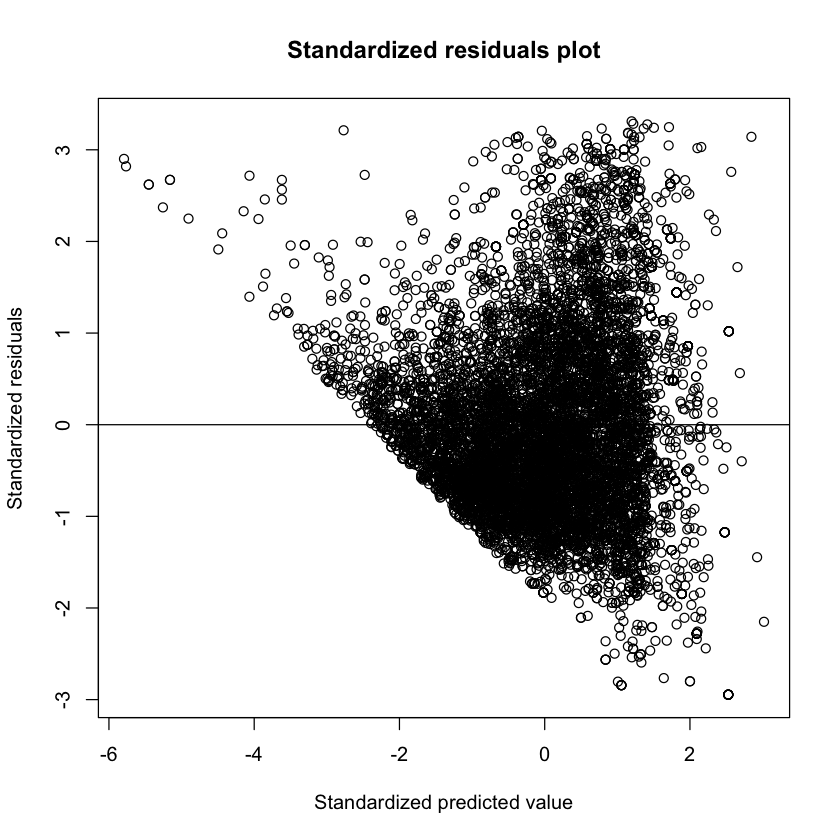

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 721.8892, Df = 1, p = < 2.22e-16

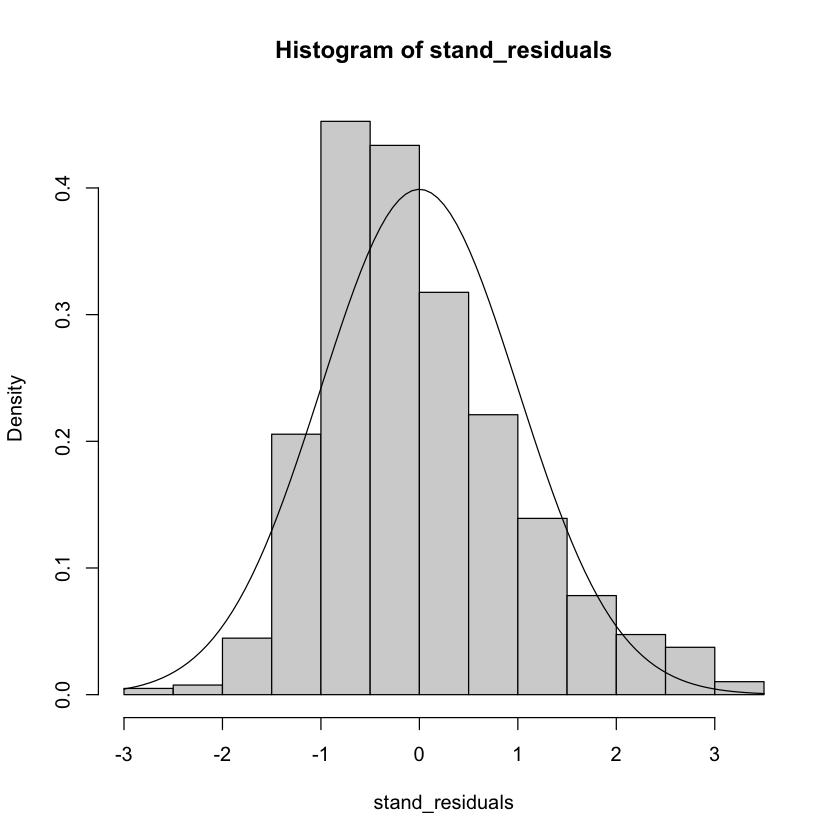

In [47]:
predicted<- predict(reg_wo_outliers)
residuals <- resid(reg_wo_outliers)
stand_predicted <- (predicted - mean(predicted)) / sd(predicted)
stand_residuals <- (residuals - mean(residuals)) / sd(residuals)

plot(stand_predicted, stand_residuals, main = "Standardized residuals plot", xlab = "Standardized predicted value", ylab = "Standardized residuals")
abline(0, 0)

hist(stand_residuals, freq = FALSE)
curve(dnorm, add = TRUE)

ncvTest(reg_wo_outliers)

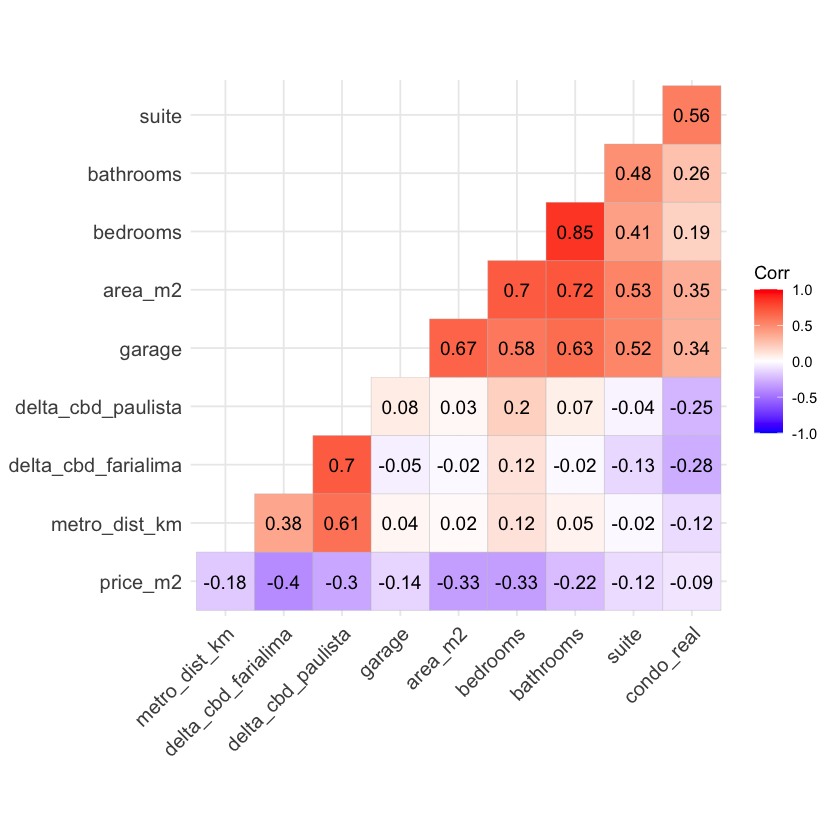

In [48]:
reduced_data <- data_rent_wo_outliers[, (names(data_rent_wo_outliers) %in% c("price_m2", "area_m2", "bedrooms", "suite", "bathrooms", "garage", "condo_real", "metro_dist_km", "delta_cbd_farialima", "delta_cbd_paulista"))]

# Compute correlation at 2 decimal places
corr_matrix <- round(cor(reduced_data), 2)
ggcorrplot(corr_matrix, hc.order = TRUE, type = "lower", lab = TRUE)